<a href="https://colab.research.google.com/github/Ramyrahmeni/DeepLearning/blob/main/one_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x = np.random.rand(30, 10)


In [ ]:
y=np.random.rand(30,1)
y = y.reshape(30, -1)
print(y.shape)

(30, 1)


In [ ]:
def sigmoid(x):
    return  1/(1 + np.exp(-x))

In [ ]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

In [ ]:
import numpy as np
W= np.random.rand(10,1)


In [ ]:
print(W.shape)

(10, 1)


In [ ]:
c = np.random.choice(range(1, 30))
print(x[c].reshape(-1,1).shape)
print(W.T.shape)
b=0
sigmoid(np.matmul(W.T, x[0])+b)
-y[c]*np.log(sigmoid(np.matmul(W.T, x[0])+b))-(1-y[0])*np.log(1-sigmoid(np.matmul(W.T, x[0])+b))

(10, 1)
(1, 10)


array([1.16290239])

## Momentum Based Gredient Descent

In [ ]:
import numpy as np

# Initialize parameters
b = 0
alpha = 0.01
beta = 0.9
loss = 0.9
W = np.random.rand(10, 1)  # Weight vector (10, 1)
L = []
vdw = np.zeros_like(W)  # Velocity for weights
vdb = 0  # Velocity for bias

# Dummy input data (31 samples, each with 10 features)
x = np.random.rand(31, 10)
# Dummy binary output labels (31 samples)
y = np.random.randint(0, 2, size=(31, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# SGD Loop
while loss > 0.001:
    c = np.random.choice(range(31))  # Select a random sample index (0 to 30)
    print("Shape of x[c]:", x[c].shape)  # Should be (10,)
    print("Shape of W:", W.shape)  # Should be (10, 1)

    Z1 = np.matmul(W.T, x[c]) + b  # Calculate Z1 (scalar)
    print("Z1:", Z1)

    A1 = sigmoid(Z1)  # Apply sigmoid
    # Calculate loss (scalar)
    loss = -y[c] * np.log(A1) - (1 - y[c]) * np.log(1 - A1)
    loss = loss.item()  # Convert to scalar if necessary

    # Gradient calculations
    dw = (A1 - y[c]) * x[c].reshape(-1, 1)  # Adjust shape for dw (10, 1)
    db = (A1 - y[c])  # Scalar for db

    # Update velocity
    vdw = beta * vdw + (1 - beta) * dw  # Update weights velocity
    vdb = beta * vdb + (1 - beta) * db  # Update bias velocity

    L.append(loss)  # Record the loss for each iteration
    # Update weights and bias
    W = W - alpha * vdw  # Update weights
    b = b - alpha * vdb  # Update bias


Streaming output truncated to the last 5000 lines.
Shape of W: (10, 1)
Z1: [0.52083261]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [-6.18828252]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [2.60605819]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [1.62918833]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [4.62734929]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [2.60612858]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [2.60660024]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [-1.45484172]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [-1.45659667]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [-1.96675615]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [-3.08631099]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [0.31180941]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [0.31577212]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [0.67692489]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [1.03564222]
Shape of x[c]: (10,)
Shape of W: (10, 1)
Z1: [-2.67907251]
Shape of x[c]: (10,)
Shape of W: (10

KeyboardInterrupt: 

In [ ]:
L

[2.117283042982388,
 0.16610171262503923,
 1.855446262102495,
 2.1008769364078157,
 2.094555041775354,
 2.09538869614682,
 0.10458983521345482,
 2.9163533915897224,
 0.048697771588972136,
 2.0977408106994013,
 2.4411965266497484,
 0.11085136629913389,
 0.08456978265313797,
 1.9100488355997118,
 3.072175451148547,
 2.8145345590374866,
 0.04410284660427147,
 3.0837900576143142,
 1.9548215578918813,
 2.313340318537458,
 1.9240360989351244,
 0.27588858272744493,
 1.8926599071470647,
 0.08468030127642506,
 0.10127433965643257,
 0.132029964365804,
 0.10376736108749451,
 0.06647433504746787,
 2.5105669254763376,
 0.14010120773527845,
 0.14103370099116214,
 2.973757308055732,
 1.6721028947098284,
 1.7567304037616116,
 0.0945362563931238,
 0.09587381415882507,
 2.893078192183466,
 1.6116448948132174,
 2.783801432439077,
 1.3380641394909187,
 0.3252184635371208,
 0.12097128740724152,
 2.720667348883976,
 2.759026766060609,
 0.1688465577270799,
 0.06827464531863982,
 1.467724606254222,
 1.6726500

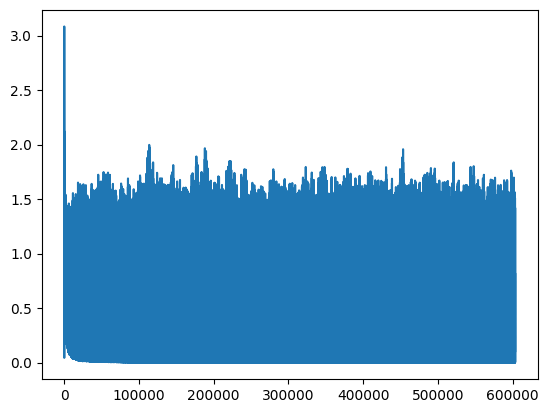

In [ ]:
import matplotlib.pyplot as plt
#datasets
xx= [i for i in range (len(L))]
#L=np.reshape(L,(len(L),-1))
#scatter plot for the dataset
plt.plot(xx,L)
plt.show()

## Adam Optimizer

In [ ]:
def compute_gredient(x,y,W,b,L):
    c = np.random.choice(range(31))

    Z1 = np.matmul(W.T, x[c]) + b
    print("Z1:", Z1)

    A1 = sigmoid(Z1)
    loss = -y[c] * np.log(A1) - (1 - y[c]) * np.log(1 - A1)
    loss = loss.item()
    L.append(loss)
    dw = (A1 - y[c]) * x[c].reshape(-1, 1)
    db = (A1 - y[c])
    return (dw,db)

In [ ]:
num_iterations=10
b=0
m=0
v=0
beta1=0.9
beta2=0.999
W = np.random.rand(10, 1)
alpha = 0.01
epsilon=0.0001
L=[]
for t in range(1,250):
  g=compute_gredient(x,y,W,b,L)
  mw=beta1*m+(1-beta1)*g[0]
  vw=beta2*v+(1-beta2)*g[0]**2
  mb=beta1*m+(1-beta1)*g[1]
  vb=beta2*v+(1-beta2)*g[1]**2
  mw_hat=mw/(1-beta1**t)
  vw_hat=vw/(1-beta2**t)
  w=w-alpha*mw_hat/(vw_hat**2+epsilon)
  mb_hat=mb/(1-beta1**t)
  vb_hat=vb/(1-beta2**t)
  b=b-alpha*mb_hat/(vb_hat**2+epsilon)



Z1: [3.5114063]
Z1: [3.50048487]
Z1: [2.70508729]
Z1: [5.78052818]
Z1: [5.46875836]
Z1: [4.59122305]
Z1: [7.07694886]
Z1: [5.64557646]
Z1: [5.78796499]
Z1: [5.6671106]
Z1: [4.8112249]
Z1: [5.84861696]
Z1: [5.57760853]
Z1: [4.74875742]
Z1: [5.1025562]
Z1: [4.70181236]
Z1: [5.15237543]
Z1: [4.555226]
Z1: [4.48146497]
Z1: [3.15040828]
Z1: [2.56334862]
Z1: [3.31906361]
Z1: [3.70642879]
Z1: [4.02178843]
Z1: [2.21513647]
Z1: [5.75777961]
Z1: [4.18310305]
Z1: [4.14643745]
Z1: [4.23167245]
Z1: [4.38195099]
Z1: [3.56173272]
Z1: [4.64256329]
Z1: [4.55483899]
Z1: [3.0830515]
Z1: [5.51840161]
Z1: [3.23829087]
Z1: [3.89975303]
Z1: [3.11401056]
Z1: [3.95221913]
Z1: [3.67406733]
Z1: [1.52858651]
Z1: [0.03490849]
Z1: [-3.19687803]
Z1: [-4.02997834]
Z1: [-3.79278427]
Z1: [-1.732999]
Z1: [-3.32190404]
Z1: [-3.71981682]
Z1: [-1.75323024]
Z1: [-3.20677175]
Z1: [-2.11456906]
Z1: [0.11119127]
Z1: [-3.95970926]
Z1: [-2.49093752]
Z1: [-0.55506511]
Z1: [-3.13235777]
Z1: [-2.10530379]
Z1: [1.46100338]
Z1: [4.16

In [ ]:
L

[3.5408242158439296,
 3.530221082146335,
 0.06472396068913963,
 0.003082329177187445,
 0.004207599852575785,
 4.601312429197108,
 7.077792846691452,
 0.003526884334635951,
 0.0030595264050776866,
 5.670562477475606,
 0.008104951432215799,
 5.851496690410399,
 5.5813829923481615,
 4.757382567973695,
 5.10861896162119,
 4.710850202229619,
 5.158144407324359,
 0.01045725603415572,
 0.011253265985782924,
 3.1923508930623994,
 2.6375710112494968,
 0.035547340798791335,
 0.02426822402120432,
 4.039550626770901,
 0.10358369515600031,
 5.760932750690044,
 0.015135980069378845,
 0.015696835763130374,
 0.01442355136925669,
 0.01242345386382986,
 0.02799407457741231,
 0.009586872569401812,
 4.565300271080717,
 0.04480052615169096,
 5.522405838896629,
 0.03848090924422429,
 0.020044667842799783,
 0.04346404235403321,
 0.01902979983918534,
 3.6991238332622314,
 1.724845451137597,
 0.7107537415211963,
 0.04007579101646516,
 0.01761859195239408,
 3.815066937357801,
 0.16275940104837605,
 0.0354482802

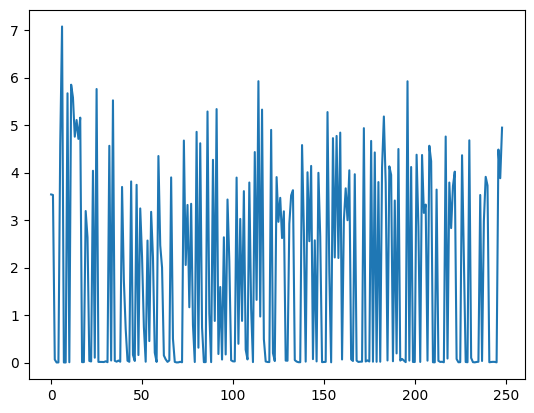

In [ ]:
import matplotlib.pyplot as plt
#datasets
xx= [i for i in range (len(L))]
#L=np.reshape(L,(len(L),-1))
#scatter plot for the dataset
plt.plot(xx,L)
plt.show()